In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import scipy.stats as stats

# Look at Data

In [2]:
tree_data = pd.read_csv('covtype_nosoil.csv')
tree_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,Aspen


In [3]:
print("Number of unique values per column:")
tree_data.T.apply(lambda x: x.nunique(), axis=1)

Number of unique values per column:


Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Cover_Type                               7
dtype: int64

In [4]:
print('Number of rows:', len(tree_data))

Number of rows: 581012


In [6]:
print('Value count of cover types:')
tree_data['Cover_Type'].value_counts()

Value count of cover types:


Lodgepole Pine       283301
Spruce/Fir           211840
Ponderosa Pine        35754
Krummholz             20510
Douglas-fir           17367
Aspen                  9493
Cottonwood/Willow      2747
Name: Cover_Type, dtype: int64

In [62]:
print('Value count of cover types by area:')
for i in range(1, 5):
    print(tree_data.groupby('Wilderness_Area' + str(i))['Cover_Type'].value_counts())

Value count of cover types by area:
Wilderness_Area1  Cover_Type       
0                 Lodgepole Pine       137104
                  Spruce/Fir           106123
                  Ponderosa Pine        35754
                  Douglas-fir           17367
                  Krummholz             15409
                  Aspen                  5712
                  Cottonwood/Willow      2747
1                 Lodgepole Pine       146197
                  Spruce/Fir           105717
                  Krummholz              5101
                  Aspen                  3781
Name: Cover_Type, dtype: int64
Wilderness_Area2  Cover_Type       
0                 Lodgepole Pine       274316
                  Spruce/Fir           193245
                  Ponderosa Pine        35754
                  Krummholz             18206
                  Douglas-fir           17367
                  Aspen                  9493
                  Cottonwood/Willow      2747
1                 Spruce/Fir     

In [45]:
print('Value count of areas:')
for i in range(1, 5):
    print(tree_data['Wilderness_Area' + str(i)].value_counts())

Value count of areas:
0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
0    544044
1     36968
Name: Wilderness_Area4, dtype: int64


In [23]:
features = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
            "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", 
            "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
cover_types = ["Aspen", "Cottonwood/Willow", "Douglas-fir", "Krummholz", "Lodgepole Pine ", "Ponderosa Pine", "Spruce/Fir"]

## Histograms

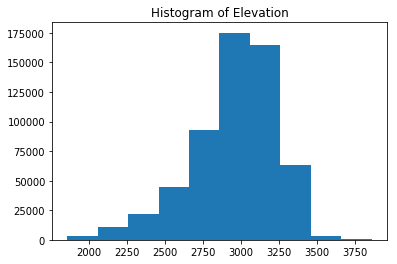

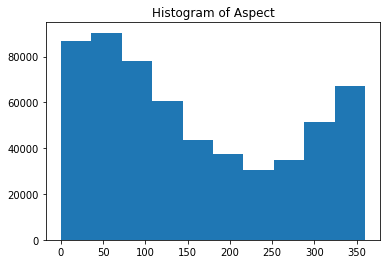

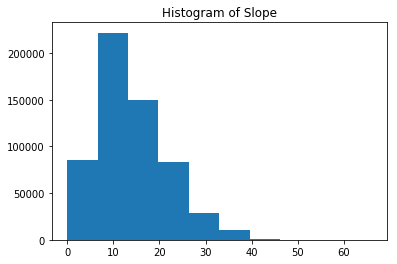

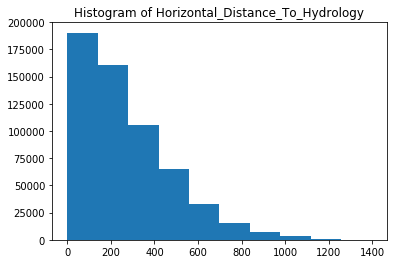

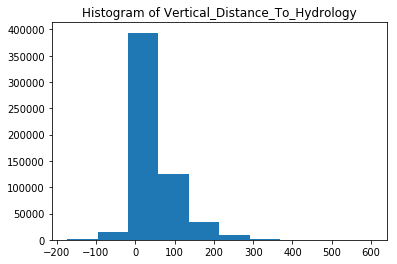

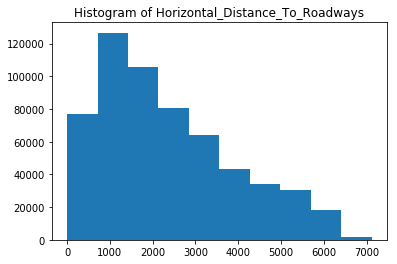

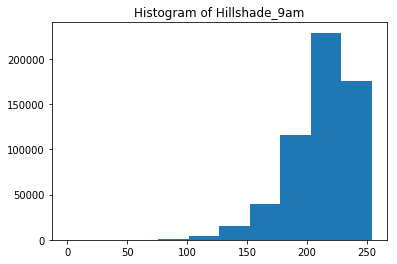

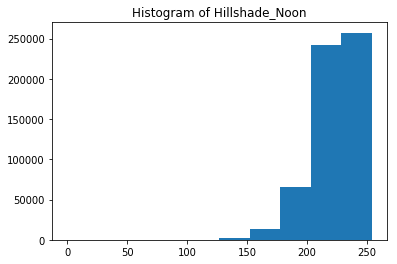

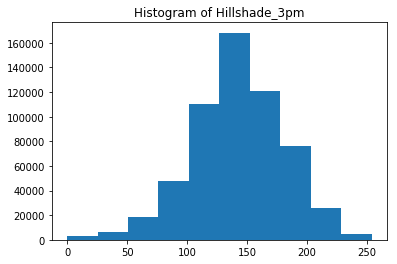

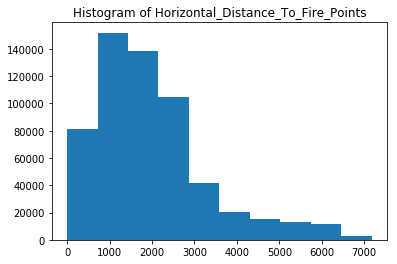

In [20]:
for feature in features:
    plt.hist(tree_data[feature])
    plt.title("Histogram of {feature}".format(feature=feature))
    plt.show()

# Preprocessing

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [29]:
normed = pd.DataFrame()

# Standardize
for feature in features:
    normed[feature] = preprocessing.scale(tree_data[feature])
    
normed["Wilderness_Area1"] = tree_data["Wilderness_Area1"]
normed["Wilderness_Area2"] = tree_data["Wilderness_Area2"]
normed["Wilderness_Area3"] = tree_data["Wilderness_Area3"]
normed["Wilderness_Area4"] = tree_data["Wilderness_Area4"]

# Encode targets
ohe = OneHotEncoder()
X = ohe.fit_transform(tree_data['Cover_Type'].values.reshape(-1, 1)).toarray()
dfOneHot = pd.DataFrame(X, columns = [cover_type for cover_type in cover_types])
normed = pd.concat([normed, dfOneHot], axis=1)

normed.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataCon

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Aspen,Cottonwood/Willow,Douglas-fir,Krummholz,Lodgepole Pine,Ponderosa Pine,Spruce/Fir
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data visualization

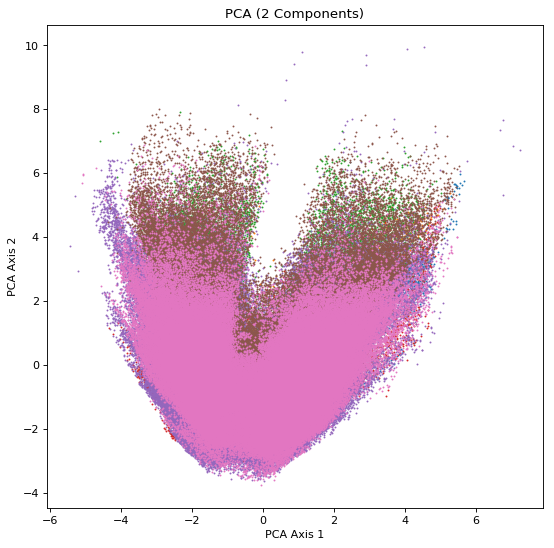

In [30]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(normed.drop(columns=cover_types))
plt.figure(figsize=(8, 8), dpi=80)
for cover_type in cover_types:
    plt.scatter(reduced[normed[cover_type] == 1, 0], reduced[normed[cover_type] == 1, 1], s=0.5)
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('PCA (2 Components)')
plt.show()

# Model Training and Testing

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
classifiers = [KNeighborsClassifier(len(cover_types)),
               DecisionTreeClassifier(),
               RandomForestClassifier(), 
               OneVsRestClassifier(LogisticRegression(multi_class='ovr', solver='sag')),
               OneVsRestClassifier(GradientBoostingClassifier()), 
               OneVsRestClassifier(SGDClassifier(max_iter=1000, tol=1e-3)),
               OneVsRestClassifier(LinearSVC(multi_class='ovr')), 
               MLPClassifier()]
clf_names = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 
             'LogisticRegression', 'GradientBoostingClassifier', 'SGDClassifier', 'LinearSVC', 'MLPClassifier']

n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=0)
X = normed.dropna().drop(columns=cover_types)
y = normed.dropna()[cover_types]

In [43]:
acc = np.zeros(len(classifiers))
pre = np.zeros(len(classifiers))
rec = np.zeros(len(classifiers))

# Stratified split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]
    for i in range(len(classifiers)):
        print('Training {clf}'.format(clf=clf_names[i]))
        classifiers[i].fit(X_train, y_train)
        print('Predicting {clf}'.format(clf=clf_names[i]))
        train_predictions = classifiers[i].predict(X_test)
        acc[i] += accuracy_score(y_test, train_predictions)
        pre[i] += precision_score(y_test, train_predictions, average='weighted')
        rec[i] += recall_score(y_test, train_predictions, average='weighted')

# Average over the number of splits
acc = acc / n_splits
pre = pre / n_splits
rec = rec / n_splits

# Print results
for i in range(len(classifiers)):
    print("="*30)
    print(clf_names[i])
    print('****Results****')
    print("Accuracy: {:.4%}".format(acc[i]))
    print("Precision: {:.4%}".format(pre[i]))
    print("Recall: {:.4%}".format(rec[i]))
print("="*30)

Training KNeighborsClassifier
Predicting KNeighborsClassifier
Training DecisionTreeClassifier
Predicting DecisionTreeClassifier
Training RandomForestClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicting RandomForestClassifier
Training LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

Predicting LogisticRegression
Training GradientBoostingClassifier
Predicting GradientBoostingClassifier
Training SGDClassifier
Predicting SGDClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Predicting LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training MLPClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicting MLPClassifier
Training KNeighborsClassifier
Predicting KNeighborsClassifier
Training DecisionTreeClassifier
Predicting DecisionTreeClassifier
Training RandomForestClassifier
Predicting RandomForestClassifier
Training LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

Predicting LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training GradientBoostingClassifier
Predicting GradientBoostingClassifier
Training SGDClassifier
Predicting SGDClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Predicting LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training MLPClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicting MLPClassifier
Training KNeighborsClassifier
Predicting KNeighborsClassifier
Training DecisionTreeClassifier
Predicting DecisionTreeClassifier
Training RandomForestClassifier
Predicting RandomForestClassifier
Training LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

Predicting LogisticRegression
Training GradientBoostingClassifier
Predicting GradientBoostingClassifier
Training SGDClassifier
Predicting SGDClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Predicting LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training MLPClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicting MLPClassifier
Training KNeighborsClassifier
Predicting KNeighborsClassifier
Training DecisionTreeClassifier
Predicting DecisionTreeClassifier
Training RandomForestClassifier
Predicting RandomForestClassifier
Training LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

Predicting LogisticRegression
Training GradientBoostingClassifier
Predicting GradientBoostingClassifier
Training SGDClassifier
Predicting SGDClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Predicting LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training MLPClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicting MLPClassifier
Training KNeighborsClassifier
Predicting KNeighborsClassifier
Training DecisionTreeClassifier
Predicting DecisionTreeClassifier
Training RandomForestClassifier
Predicting RandomForestClassifier
Training LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

Predicting LogisticRegression


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training GradientBoostingClassifier
Predicting GradientBoostingClassifier
Training SGDClassifier
Predicting SGDClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Predicting LinearSVC


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training MLPClassifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicting MLPClassifier
KNeighborsClassifier
****Results****
Accuracy: 90.6734%
Precision: 91.4858%
Recall: 90.6734%
DecisionTreeClassifier
****Results****
Accuracy: 92.7279%
Precision: 92.7273%
Recall: 92.7279%
RandomForestClassifier
****Results****
Accuracy: 91.3481%
Precision: 95.5057%
Recall: 91.3481%
LogisticRegression
****Results****
Accuracy: 57.1825%
Precision: 67.6689%
Recall: 61.6903%
GradientBoostingClassifier
****Results****
Accuracy: 69.7266%
Precision: 74.3856%
Recall: 73.9067%
SGDClassifier
****Results****
Accuracy: 61.6886%
Precision: 66.8478%
Recall: 64.8488%
LinearSVC
****Results****
Accuracy: 58.1940%
Precision: 68.5775%
Recall: 61.1626%
MLPClassifier
****Results****
Accuracy: 77.2276%
Precision: 82.3272%
Recall: 80.1420%


## Feature importance

In [44]:
classifiers[1].feature_importances_

array([0.34633197, 0.03128799, 0.02220981, 0.07094757, 0.05424337,
       0.16886888, 0.03577503, 0.04027829, 0.02724512, 0.16248518,
       0.01739276, 0.00449432, 0.01642359, 0.00201613])

In [45]:
classifiers[2].feature_importances_

array([0.30954313, 0.04853666, 0.03513178, 0.06911692, 0.06582247,
       0.14034695, 0.04228885, 0.04534439, 0.0419242 , 0.13443443,
       0.01171311, 0.00577819, 0.01629848, 0.03372043])